In [1]:
!pip install matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Data

In [3]:
ratings = pd.read_csv('rating.csv')

In [4]:
movies = pd.read_csv('movie.csv')

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Step 3: Exploratory Data Analysis

In [7]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 20000263
Number of unique movieId's: 26744
Number of unique users: 138493
Average number of ratings per user: 144.41
Average number of ratings per movie: 747.84


### What is the distribution of movie ratings?

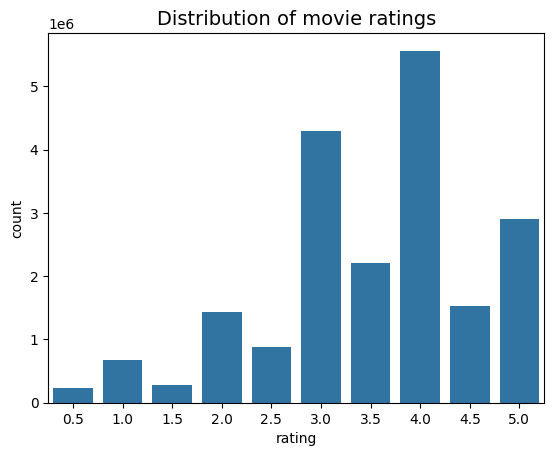

In [8]:
sns.countplot(x='rating', data=ratings)
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [9]:
print(f"Mean  global rating: {round(ratings['rating'].mean(),2)}.")

Mean global rating: 3.53.


In [10]:
mean_ratings = ratings.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean rating per user: 3.63.


### Which movies are most frequently rated?

In [11]:
movie_ratings = ratings.merge( movies, on='movieId'  )
movie_ratings['title'].value_counts()[0:10]

Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
Name: title, dtype: int64

In [12]:
movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
20000258,138301,121017,3.5,2015-01-06 15:34:39,The Gentleman from Epsom (1962),Comedy|Crime
20000259,138301,121019,4.5,2015-01-06 15:36:46,The Great Spy Chase (1964),Action|Comedy|Thriller
20000260,138301,121021,4.5,2015-01-06 15:38:07,Taxi for Tobruk (1961),Drama|War
20000261,138406,110167,4.5,2014-03-30 12:55:27,"Judge and the Assassin, The (Juge et l'assassi...",Crime|Drama


Forrest Gump, Shawshank Redemption, and Pulp Fiction have the most ratings.

### What are the lowest and highest rated movies?

### Which movie has the lowest and highest average rating?

In [13]:
mean_ratings = ratings.groupby('movieId')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()

movies[movies['movieId'] == lowest_rated]

,movieId,title,genres
5706,5805,Besotted (2001),Drama


`Gypsy` has the lowest average rating.

In [14]:
highest_rated = mean_ratings['rating'].idxmax()
movies[movies['movieId'] == highest_rated]

,movieId,title,genres
9007,26718,Life On A String (Bian chang Bian Zou) (1991),Adventure|Drama|Fantasy|Musical


How many ratings does `Lamerica` have?

In [15]:
ratings[ratings['movieId']==highest_rated]

,userId,movieId,rating,timestamp
11067861,76495,26718,5.0,2012-03-19 03:51:41


`Lamerica` may be the "highest" rated movie, but it only has 2 ratings. A better approach for evaluating movie popularity is to do look at the [Bayesian average](https://en.wikipedia.org/wiki/Bayesian_average).

#### Bayesian Average

[Bayesian Average](https://en.wikipedia.org/wiki/Bayesian_average) is defined as:

$r_{i} = \frac{C \times m + \Sigma{\text{reviews}}}{C+N}$

where $C$ represents our confidence, $m$ represents our prior, and $N$ is the total number of reviews for movie $i$.

- $C$ represents "the typical data set size". In this case, $C$ will be the average number of ratings for a given movie.
- $m$ represents the average rating across all movies

In [16]:
movie_stats = ratings.groupby('movieId')['rating'].agg(['count','mean'])
movie_stats.head()

,count,mean
movieId,,
1,49695,3.921240
2,22243,3.211977
3,12735,3.151040
4,2756,2.861393
5,12161,3.064592


In [17]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movie: 747.84
Average rating for a given movie: 3.13


Let's test our `bayesian_avg` function out on `Lamerica`:

In [18]:
lamerica = pd.Series([5])
bayesian_avg(lamerica)

3.136

`Lamerica`'s average Bayesian rating is 3.5.

Let's now apply `bayesian_avg` to all movies in our dataset.

In [19]:
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')

In [20]:
movie_stats.head()

,movieId,count,mean,bayesian_avg
0,1,49695,3.921240,3.910
1,2,22243,3.211977,3.209
2,3,12735,3.151040,3.150
3,4,2756,2.861393,2.919
4,5,12161,3.064592,3.069


In [21]:
movie_stats = movie_stats.merge(movies[['movieId', 'title']])
movie_stats.sort_values(by='bayesian_avg',ascending=False)

,movieId,count,mean,bayesian_avg,title
315,318,63366,4.446990,4.432,"Shawshank Redemption, The (1994)"
843,858,41355,4.364732,4.343,"Godfather, The (1972)"
49,50,47006,4.334372,4.316,"Usual Suspects, The (1995)"
523,527,50054,4.310175,4.293,Schindler's List (1993)
1195,1221,27398,4.275641,4.245,"Godfather: Part II, The (1974)"
...,...,...,...,...,...
2298,2383,2155,1.794896,2.140,Police Academy 6: City Under Siege (1989)
1648,1707,2697,1.819985,2.105,Home Alone 3 (1997)
1694,1760,2658,1.770316,2.070,Spice World (1997)
1506,1556,5326,1.912317,2.063,Speed 2: Cruise Control (1997)


Using the Bayesian average, we see that `Shawshank Redemption`, `The Godfather`, and `The Usual Suspects` are the most highly rated movies. This result makes much more sense since these movies are critically acclaimed films.

In [22]:
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movieId,count,mean,bayesian_avg,title
3502,3593,3973,1.600554,1.843,Battlefield Earth (2000)
1506,1556,5326,1.912317,2.063,Speed 2: Cruise Control (1997)
1694,1760,2658,1.770316,2.070,Spice World (1997)
1648,1707,2697,1.819985,2.105,Home Alone 3 (1997)
2298,2383,2155,1.794896,2.140,Police Academy 6: City Under Siege (1989)


With Bayesian averaging, it looks like `Speed 2: Cruise Control`, `Battlefield Earth`, and `Godzilla` are the worst rated movies. `Gypsy` isn't so bad after all.

### A Glimpse at Movie Genres

The movies dataset needs to be cleaned in two ways:

- `genres` is expressed as a string with a pipe `|` separating each genre. We will manipulate this string into a list, which will make it much easier to analyze.
- `title` currently has (year) appended at the end. We will extract year from each title string and create a new column for it.

In [23]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
movies['genres'] = movies['genres'].apply(lambda x:x.split('|'))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


**How many movie genres are there?**

In [25]:
from collections import Counter

genre_frequency = Counter(g for G in movies['genres'] for g in G )

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Adventure': 2329,
         'Animation': 1027,
         'Children': 1139,
         'Comedy': 8374,
         'Fantasy': 1412,
         'Romance': 4127,
         'Drama': 13344,
         'Action': 3520,
         'Crime': 2939,
         'Thriller': 4178,
         'Horror': 2611,
         'Mystery': 1514,
         'Sci-Fi': 1743,
         'IMAX': 196,
         'Documentary': 2471,
         'War': 1194,
         'Musical': 1036,
         'Western': 676,
         'Film-Noir': 330,
         '(no genres listed)': 246})

In [26]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 13344), ('Comedy', 8374), ('Thriller', 4178), ('Romance', 4127), ('Action', 3520)]


The top 5 genres are: `Drama`, `Comedy`, `Thriller`, `Action` and `Romance`.

Let's also visualize genres popularity with a barplot.

In [27]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']
genre_frequency_df

,genre,count
0,Adventure,2329
1,Animation,1027
2,Children,1139
3,Comedy,8374
4,Fantasy,1412
5,Romance,4127
6,Drama,13344
7,Action,3520
8,Crime,2939
9,Thriller,4178


C:\Users\akash\AppData\Local\Temp\ipykernel_12960\2835692610.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count'),palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'IMAX'),
  Text(1, 0, '(no genres listed)'),
  Text(2, 0, 'Film-Noir'),
  Text(3, 0, 'Western'),
  Text(4, 0, 'Animation'),
  Text(5, 0, 'Musical'),
  Text(6, 0, 'Children'),
  Text(7, 0, 'War'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Mystery'),
  Text(10, 0, 'Sci-Fi'),
  Text(11, 0, 'Adventure'),
  Text(12, 0, 'Documentary'),
  Text(13, 0, 'Horror'),
  Text(14, 0, 'Crime'),
  Text(15, 0, 'Action'),
  Text(16, 0, 'Romance'),
  Text(17, 0, 'Thriller'),
  Text(18, 0, 'Comedy'),
  Text(19, 0, 'Drama')])

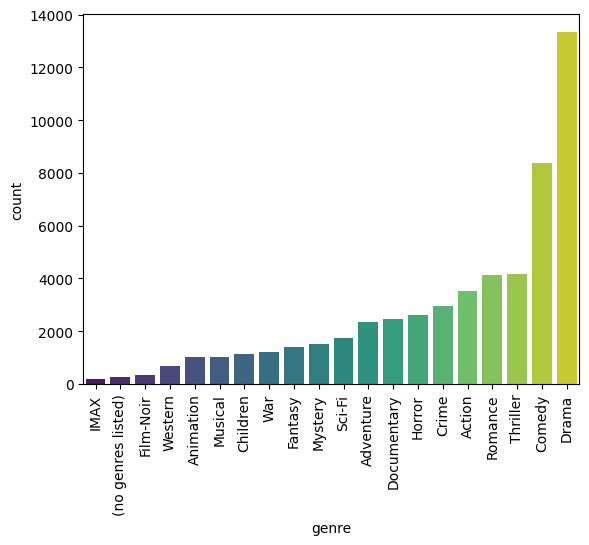

In [28]:
sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count'),palette='viridis')
plt.xticks(rotation=90)

### Step 4: Data Pre-processing

We are going to use a technique called colaborative filtering to generate recommendations for users. This technique is based on the premise that similar people like similar things.

The first step is to transform our data into a user-item matrix, also known as a "utility" matrix. In this matrix, rows represent users and columns represent movies. The beauty of collaborative filtering is that it doesn't require any information about the users or the movies user to generate recommendations.

<img src="https://github.com/topspinj/tmls-2020-recommender-workshop/blob/master/images/user_movie_matrix.png?raw=1" width=50%/>

The `create_X()` function outputs a sparse matrix $X$ with four mapper dictionaries:

- **user_mapper**: maps user id to user index
- **movie_mapper**: maps movie id to movie index
- **user_inv_mapper**: maps user index to user id
- **movie_inv_mapper**: maps movie index to movie id

We need these dictionaries because they map which row/column of the utility matrix corresponds to which user/movie id.

Our $X$ (user-item) matrix is a [scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) which stores the data sparsely.

In [29]:
!pip install scipy


In [30]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.

    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)

    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

In [31]:
X.shape

(138493, 26744)

Our `X` matrix contains 610 users and 9724 movies.

### Evaluating sparsity

Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix ([nnz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.nnz.html)) is equivalent to the number of ratings in our dataset.

In [32]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.54%


`csr_matrix.nnz` counts the stored values in our sparse matrix. The rest of our cells are empty.

The **cold start problem** is when there are new users and movies in our matrix that do not have any ratings. In our Movielens dataset, all users and movies have at least one rating but in general, it's useful to check which users and movies have few interactions.

In [33]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

138493

In [34]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 9254 movies.
Least active user rated 20 movies.


In [35]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

26744

In [36]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 67310 ratings.
Least rated movie has 1 ratings.


C:\Users\akash\AppData\Local\Temp\ipykernel_12960\3364525973.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_user, shade=True)
C:\Users\akash\AppData\Local\Temp\ipykernel_12960\3364525973.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_movie, shade=True)


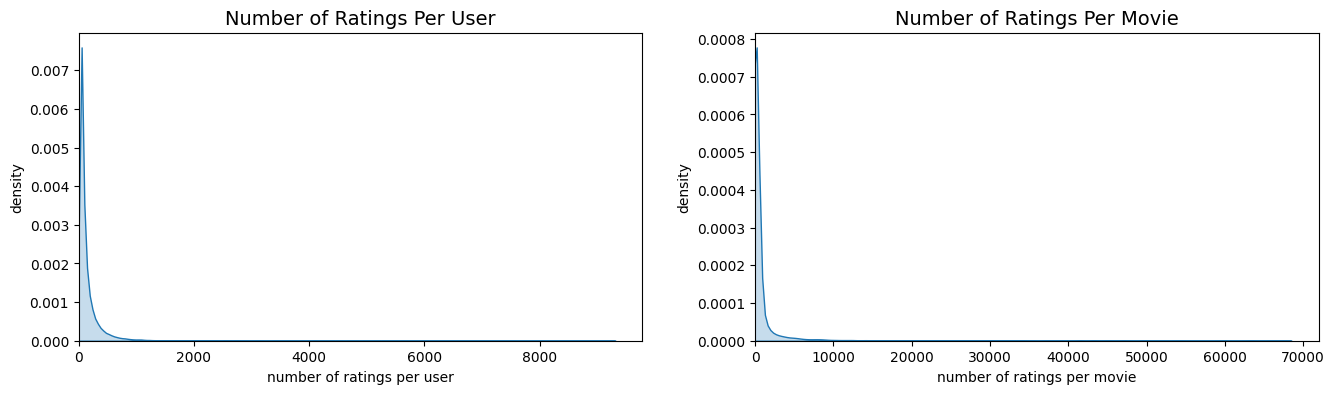

In [37]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

### Step 5: Item-item Recommendations with k-Nearest Neighbors

We are going to find the $k$ movies that have the most similar user engagement vectors for movie $i$.

In [38]:
!pip install scikit-learn fuzzywuzzy

In [39]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.

    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

`find_similar_movies()` takes in a `movieId` and `X` matrix, and outputs a list of $k$ movies that are similar to the `movieId` of interest.

Let's see how it works in action. We will first create another mapper that maps movieId to title so that our results are interpretable.

In [40]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[260, 780, 1210, 3114, 1270, 356, 588, 648, 480]

`find_similar_movies()` returns a list of `movieId`'s that are most similar to your movie of interest. Let's convert these id's to titles so that we can interpret our results. To make things easier, we will create a dictionary that maps `movieId` to `title`.

In [41]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 12

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Dracula: Dead and Loving It (1995):
Spy Hard (1996)
Sgt. Bilko (1996)
Bio-Dome (1996)
Down Periscope (1996)
Nutty Professor, The (1996)
Lawnmower Man 2: Beyond Cyberspace (1996)
Craft, The (1996)
Phantom, The (1996)
Eraser (1996)


The results above show the 10 movies that are most similar to Toy Story. Most movies in this list are family movies from the 1990s, which seems pretty reasonable. Note that these recommendations are based solely on user-item ratings. Movie features such as genres are not used in this approach.

You can also play around with the kNN distance metric and see what results you would get if you use "manhattan" or "euclidean" instead of "cosine".

In [42]:
movie_id = 12

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='manhattan', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Dracula: Dead and Loving It (1995):
Howling V: The Rebirth (1989)
White Night Wedding (Brúðguminn) (2008)
Phone (Pon) (2002)
Rock 'n' Roll Nightmare (1987)
DNA (1997)
Resurrected, The (1992)
Maniac Cop 2 (1990)
Urban Ghost Story (1998)
Cold Turkey (1971)


### Step 6: Handling the cold-start problem

Collaborative filtering relies solely on user-item interactions within the utility matrix. The issue with this approach is that brand new users or items with no iteractions get excluded from the recommendation system. This is called the **cold start problem**. Content-based filtering is a way to handle this problem by generating recommendations based on user and item features.

First, we need to convert the `genres` column into binary features. Each genre will have its own column in the dataframe, and will be populated with 0 or 1.

In [43]:
n_movies = movies['movieId'].nunique()
print(f"There are {n_movies} unique movies in our movies dataset.")

There are 27278 unique movies in our movies dataset.


In [44]:
genres = set(g for G in movies['genres'] for g in G)

for g in genres:
    movies[g] = movies.genres.transform(lambda x: int(g in x))

movie_genres = movies.drop(columns=['movieId', 'title','genres'])

In [45]:
movies.head()

,movieId,title,genres,Children,IMAX,Drama,Western,Musical,Thriller,Sci-Fi,...,(no genres listed),Adventure,Romance,Film-Noir,War,Documentary,Horror,Animation,Mystery,Comedy
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
movie_genres.head()

,Children,IMAX,Drama,Western,Musical,Thriller,Sci-Fi,Fantasy,Crime,Action,(no genres listed),Adventure,Romance,Film-Noir,War,Documentary,Horror,Animation,Mystery,Comedy
0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (27278, 27278)


In [48]:
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.4472136 , 0.        ,
        0.51639778],
       [0.77459667, 1.        , 0.        , ..., 0.57735027, 0.        ,
        0.66666667],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.4472136 , 0.57735027, 0.        , ..., 1.        , 0.        ,
        0.57735027],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.51639778, 0.66666667, 0.        , ..., 0.57735027, 0.        ,
        1.        ]])

As expected, after passing the `movie_genres` dataframe into the cosine_similarity() function, we get a cosine similarity matrix of shape $(n_{\text{movies}}, n_{\text{movies}})$.

This matrix is populated with values between 0 and 1 which represent the degree of similarity between movies along the x and y axes.

### Creating a movie finder function
Let's say we want to get recommendations for movies that are similar to Jumanji. To get results from our recommender, we need to know the exact title of a movie in our dataset.

In our dataset, Jumanji is actually listed as 'Jumanji (1995)'. If we misspell Jumanji or forget to include its year of release, our recommender won't be able to identify which movie we're interested in.

To make our recommender more user-friendly, we can use a Python package called [fuzzywuzzy](https://pypi.org/project/fuzzywuzzy/) which will find the most similar title to a string that you pass in. Let's create a function called `movie_finder()` which take advantage of fuzzywuzzy's string matching algorithm to get the most similar title to a user-inputted string.

In [49]:
# import fuzzywuzzy
!pip install fuzzywuzzy

In [50]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

c:\Users\akash\AppData\Local\Programs\Python\Python38\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Let's test this out with our Jumanji example.

In [51]:
title = movie_finder('joy story')
title

'Toy Story (1995)'

To get relevant recommendations for `Jumanji`, we need to find its index in the cosine simialrity matrix. To identify which row we should be looking at, we can create a movie index mapper which maps a movie title to the index that it represents in our matrix.

Let's create a movie index dictionary called `movie_idx` where the keys are movie titles and values are movie indices:

In [52]:
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title]
print(f"Movie index for Jumanji: {idx}")

Movie index for Jumanji: 0


Using this handy `movie_idx` dictionary, we know that Jumanji is represented by index 1 in our matrix. Let's get the top 10 most similar movies to Jumanji.

In [53]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
# sim_scores
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores  = sim_scores[1:(n_recommendations+1)]
sim_scores


[(2209, 0.9999999999999999),
 (3027, 0.9999999999999999),
 (3663, 0.9999999999999999),
 (3922, 0.9999999999999999),
 (4790, 0.9999999999999999),
 (10114, 0.9999999999999999),
 (10987, 0.9999999999999999),
 (11871, 0.9999999999999999),
 (13337, 0.9999999999999999),
 (18274, 0.9999999999999999)]

`similar_movies` is an array of indices that represents Jumanji's top 10 recommendations. We can get the corresponding movie titles by either creating an inverse movie_idx mapper or using iloc on the title column of the movies dataframe.

In [54]:
similar_movies = [i[0] for i in sim_scores]
similar_movies

[2209, 3027, 3663, 3922, 4790, 10114, 10987, 11871, 13337, 18274]

In [55]:
print(f"Because you watched {title}:")
movies['title'].iloc[similar_movies]

Because you watched Toy Story (1995):


2209                                           Antz (1998)
3027                                    Toy Story 2 (1999)
3663        Adventures of Rocky and Bullwinkle, The (2000)
3922                      Emperor's New Groove, The (2000)
4790                                 Monsters, Inc. (2001)
10114    DuckTales: The Movie - Treasure of the Lost La...
10987                                     Wild, The (2006)
11871                               Shrek the Third (2007)
13337                       Tale of Despereaux, The (2008)
18274    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object

Cool! These recommendations seem pretty relevant and similar to Jumanji. The first 5 movies are family-friendly films from the 90s.

We can test our recommender further with other movie titles. For your convenience, let's package the steps into a single function which takes in the movie title of interest and number of recommendations.

In [56]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(movies['title'].iloc[similar_movies])

In [57]:
get_content_based_recommendations('toy story', 5)

Because you watched Toy Story (1995):
2209                                       Antz (1998)
3027                                Toy Story 2 (1999)
3663    Adventures of Rocky and Bullwinkle, The (2000)
3922                  Emperor's New Groove, The (2000)
4790                             Monsters, Inc. (2001)
Name: title, dtype: object


### Step 7: Dimensionality Reduction with Matrix Factorization (advanced)

Matrix factorization (MF) is a linear algebra technique that can help us discover latent features underlying the interactions between users and movies. These latent features give a more compact representation of user tastes and item descriptions. MF is particularly useful for very sparse data and can enhance the quality of recommendations. The algorithm works by factorizing the original user-item matrix into two factor matrices:

- user-factor matrix (n_users, k)
- item-factor matrix (k, n_items)

We are reducing the dimensions of our original matrix into "taste" dimensions. We cannot interpret what each latent feature $k$ represents. However, we could imagine that one latent feature may represent users who like romantic comedies from the 1990s, while another latent feature may represent movies which are independent foreign language films.

$$X_{mn}\approx P_{mk}\times Q_{nk}^T = \hat{X} $$
<img src="https://github.com/topspinj/tmls-2020-recommender-workshop/blob/master/images/matrix_factorization.png?raw=1" width="50%"/>

In [58]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components= 20, n_iter=10)
Q = svd.fit_transform(X.T)
Q.shape

(26744, 20)

In [59]:
X.shape

(138493, 26744)

In [60]:
movie_id = 1
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Willy Wonka & the Chocolate Factory (1971)
Independence Day (a.k.a. ID4) (1996)
Mission: Impossible (1996)
James and the Giant Peach (1996)
Toy Story 2 (1999)
Twister (1996)
Star Wars: Episode IV - A New Hope (1977)
Lion King, The (1994)
Rock, The (1996)


The results above are the most similar movies to Toy Story using kNN on our “compressed” movie-factor matrix. We reduced the dimensions down to n_components=20. We can think of each component representing a latent feature such as movie genre.